DATASETS DESBALANCEADOS => https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Vamos testar fazer o processo de classificação utilizando acima (link) disponível no Kaggle.

In [5]:
# Importando a base de transações de cartão de crédito
import pandas as pd

base = pd.read_csv('creditcard.csv', encoding='utf-8')

In [6]:
# Visualizando essa base

base.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Verificar os valores Nulos

base.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Separando em X e y

X = base.drop('Class', axis=1)
y = base.Class

<AxesSubplot:ylabel='Class'>

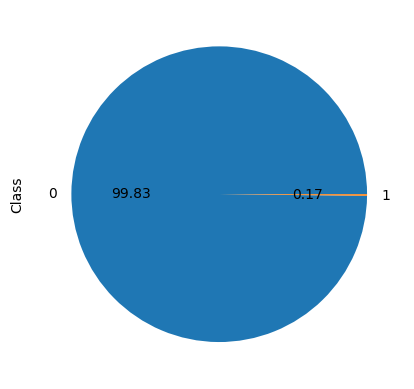

In [9]:
# Visualizando a proporção dessa base

y.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:>

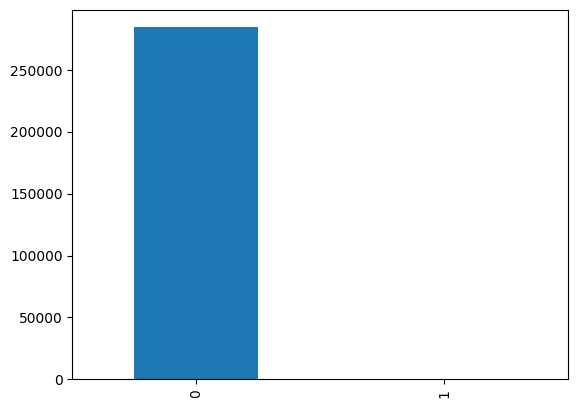

In [10]:
# Visualizando como um gráfico de barras

y.value_counts().plot.bar()

In [11]:
# Contando os valores em cada classe

y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
# Verificando a proporção

(y.value_counts()/y.shape[0])*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

Vamos separar os dados em treino e usando este teste => train_test_split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [13]:
# Importando o train_test_split

from sklearn.model_selection import train_test_split

In [14]:
# Fazendo a separação em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [15]:
# Verificação a proporção na base de treino

(y_train.value_counts()/y_train.shape[0])*100

0    99.827062
1     0.172938
Name: Class, dtype: float64

In [16]:
# Contando a quantidade de registros na base de  treino

y_train.value_counts()

0    190490
1       330
Name: Class, dtype: int64

In [17]:
# E na base de  teste

(y_test.value_counts()/y_test.shape[0])*100

0    99.827636
1     0.172364
Name: Class, dtype: float64

Regressão Logística
 
 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=regression+logistic#sklearn.linear_model.LogisticRegression

In [18]:
# Importando a regressão logística

from sklearn.linear_model import LogisticRegression

In [19]:
# Definindo o nosso classificador 

clf = LogisticRegression(random_state=0, max_iter=500)

In [20]:
# Fazendo o fit dados

clf = clf.fit(X_train, y_train)

In [21]:
# Fazer a previsão da nossa base de teste

y_pred = clf.predict(X_test)

# Avaliando o modelo

Accuracy_score => https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

Confusion Matrix => https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

Recall => https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score



In [22]:
# Importando metrics do sklearn

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [23]:
# Avaliando a curácia do modelo

accuracy_score(y_test, y_pred)

0.9989679423750093

In [24]:
# Visualizando a matriz de confusão

confusion_matrix(y_test, y_pred)

array([[93784,    41],
       [   56,   106]], dtype=int64)

In [25]:
# E calculando o recall

recall_score(y_test, y_pred)

0.654320987654321

Podemos testar outros algoritmos para funcionar melhor em datasets desbalanceados

Árvore de Classificação => https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=tree+decision

In [26]:
# Importando a árvore de classificação

from sklearn.tree import DecisionTreeClassifier

In [27]:
# Definindo o nosso classificador 

clfAD = DecisionTreeClassifier(random_state=0)

In [28]:
# Fazendo o fit dados

clfAD = clfAD.fit(X_train, y_train)

In [29]:
# Fazer a previsão da nossa base de teste

y_predAD = clfAD.predict(X_test)

In [30]:
# Visualizando a matriz de confusão

confusion_matrix(y_test, y_predAD)

array([[93790,    35],
       [   41,   121]], dtype=int64)

In [31]:
# E calculando o recall

recall_score(y_test, y_predAD)

0.7469135802469136

# BALANCEANDO O DATASET

- Temos 2 classes:
    - Classe <strong> majoritária: </strong> que possui mais registros. 
    - Classe <strong> minoritária: </strong> que possui menos registros.
    
- Podemos balancear o dataset reduzindo os registros da classe majoritária (com mais registros) ou aumentando os registros da classe minoritária(com menos registros).

VAMOS COMEÇAR A RESOLVER:

- Podemos retirar dados da classe que possui mais registros, e tomar mais cuidado para que essa retirada não acabe causando perda de informação (retirando informações são muitos importantes)
    - Énecessário verificar o tamanho da base restante
- Para começar fazer isso, teremos que excluir alguns registros de forma aleatória com o RandomUnderSampler

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

Instalar a biblioteca => pip install -U imbalanced-learn

Classe Majoritária

In [32]:
# Importando o RandomUnderSampler do imblearn

from imblearn.under_sampling import RandomUnderSampler 

In [33]:
# Definindo o RandomUnderSampler

rus = RandomUnderSampler(random_state=42)


In [34]:
# Aplicando X e y em treino

X_res, y_res = rus.fit_resample(X_train, y_train)

<AxesSubplot:ylabel='Class'>

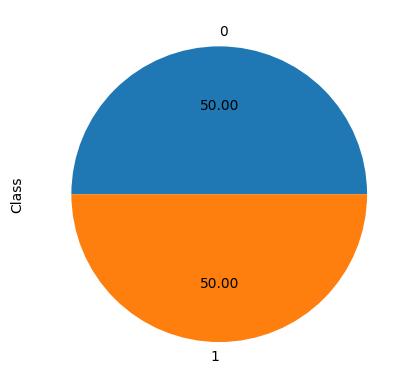

In [35]:
# Visualizando graficamente

y_res.value_counts().plot.pie(autopct='%.2f')

In [36]:
# Contando os valores em cada classe

y_res.value_counts()

0    330
1    330
Name: Class, dtype: int64

In [37]:
# Podemos usar novamente a Regressão Logística e verificar o resultado

clf2 = LogisticRegression(random_state=0, max_iter=500)

clf2 = clf2.fit(X_res, y_res)

y_pred2 = clf2.predict(X_test)

In [38]:
# Verificando o recall da Regressão Logística

recall_score(y_test, y_pred2)

0.8827160493827161

In [39]:
# Podemos usar novamente a Árvore de decisão e verificar o resultado

clfAD2 = DecisionTreeClassifier(random_state=0)

clfAD2 = clfAD2.fit(X_res, y_res)

y_predAD2 = clfAD2.predict(X_test)


In [40]:
# Verificando o recall da Arvore de decisão

recall_score(y_test, y_predAD2)

0.9012345679012346

Comparandos os recalls e precisão

In [41]:
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
print(f'O resultado do recall ficou {rec}')
print(f'O resultado do precisão ficou {prec}')
print('-'*50)
rec2 = recall_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred)
print(f'O resultado do recall ficou {rec2}')
print(f'O resultado do precisão ficou {prec2}')
print('-'*50)
rec3 = recall_score(y_test, y_predAD)
prec3 = precision_score(y_test, y_predAD)
print(f'O resultado do recall ficou {rec3}')
print(f'O resultado do precisão ficou {prec3}')
print('-'*50)
rec4 = recall_score(y_test, y_predAD2)
prec4 = precision_score(y_test, y_pred)
print(f'O resultado do recall ficou {rec4}')
print(f'O resultado do precisão ficou {prec4}')

O resultado do recall ficou 0.654320987654321
O resultado do precisão ficou 0.7210884353741497
--------------------------------------------------
O resultado do recall ficou 0.8827160493827161
O resultado do precisão ficou 0.7210884353741497
--------------------------------------------------
O resultado do recall ficou 0.7469135802469136
O resultado do precisão ficou 0.7756410256410257
--------------------------------------------------
O resultado do recall ficou 0.9012345679012346
O resultado do precisão ficou 0.7210884353741497


Classe Minoritária

In [42]:
# Importando o RandomOverSampler do imblearn

from imblearn.over_sampling import RandomOverSampler 

In [43]:
# Instanciando
ros = RandomOverSampler(random_state=42)

In [44]:
# Aplicando para X e y

X_ros, y_ros = ros.fit_resample(X_train, y_train)

<AxesSubplot:ylabel='Class'>

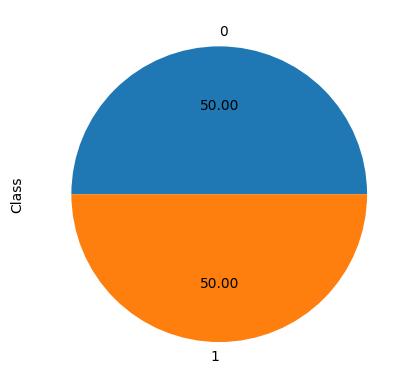

In [45]:
# Visualizando graficamente

y_ros.value_counts().plot.pie(autopct='%.2f')

In [46]:
# Contando os valores em cada classe

y_ros.value_counts()

0    190490
1    190490
Name: Class, dtype: int64

In [47]:
# Podemos usar novamente a Regressão Logística e verificar o resultado

clf2 = LogisticRegression(random_state=0, max_iter=500)

clf2 = clf2.fit(X_ros, y_ros)

y_pred2 = clf2.predict(X_test)

In [48]:
# Precision_score

precision_score(y_test, y_pred2)

0.04398289554062309

In [49]:
# Recall 

recall_score(y_test, y_pred2)

0.8888888888888888

In [50]:
# Podemos usar novamente a Árvore de decisão e verificar o resultado

clfAD2 = DecisionTreeClassifier(random_state=0)

clfAD2 = clfAD2.fit(X_ros, y_ros)

y_predAD2 = clfAD2.predict(X_test)

In [51]:
# Recall 

recall_score(y_test, y_predAD2)

0.691358024691358

# VISUALIZAR OS GRÁFICOS PARA ESSE RESULTADO

In [52]:
import matplotlib.pyplot as plt

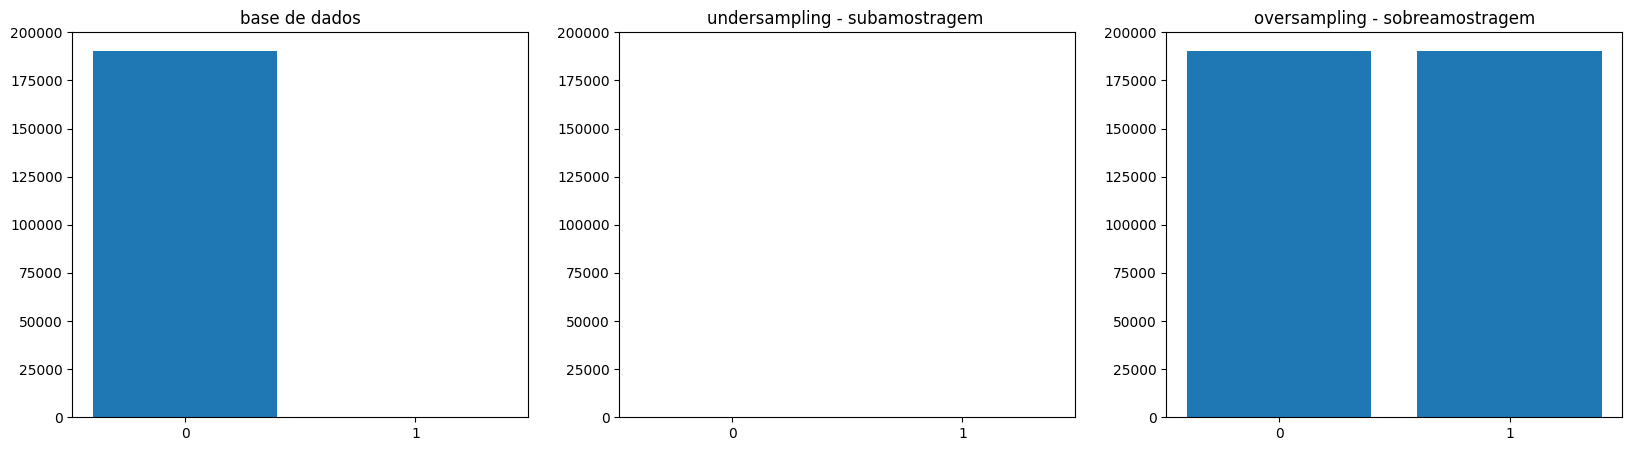

In [53]:
# Plotando os 3 gráficos

fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].bar(y_train.value_counts().index, y_train.value_counts().values)
ax[1].bar(y_res.value_counts().index, y_res.value_counts().values)
ax[2].bar(y_ros.value_counts().index, y_ros.value_counts().values)

ax[0].set(ylim=(0, 200000), xticks=[0,1])
ax[0].set_title('base de dados')

ax[1].set(ylim=(0, 200000), xticks=[0,1])
ax[1].set_title('undersampling - subamostragem ')

ax[2].set(ylim=(0, 200000), xticks=[0,1])
ax[2].set_title('oversampling - sobreamostragem')


plt.show()